In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statistics as st
import warnings
import os
warnings.filterwarnings("ignore")
sns.set(rc={"figure.figsize":(15,6)})
pd.pandas.set_option("display.max_columns",None)
%matplotlib inline

In [56]:
root = "/content/drive/MyDrive/Colab_Notebooks"
os.chdir(root)

In [57]:
data = pd.read_csv("CVD_cleaned.csv")

In [58]:
data.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0


In [59]:
data.tail()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
308849,Very Good,Within the past year,Yes,No,No,No,No,No,No,Male,25-29,168.0,81.65,29.05,No,4.0,30.0,8.0,0.0
308850,Fair,Within the past 5 years,Yes,No,No,No,No,Yes,No,Male,65-69,180.0,69.85,21.48,No,8.0,15.0,60.0,4.0
308851,Very Good,5 or more years ago,Yes,No,No,No,Yes,"Yes, but female told only during pregnancy",No,Female,30-34,157.0,61.23,24.69,Yes,4.0,40.0,8.0,4.0
308852,Very Good,Within the past year,Yes,No,No,No,No,No,No,Male,65-69,183.0,79.38,23.73,No,3.0,30.0,12.0,0.0
308853,Excellent,Within the past year,Yes,No,No,No,No,No,No,Female,45-49,160.0,81.19,31.71,No,1.0,5.0,12.0,1.0


In [60]:
## Get The shape of data
data.shape

(308854, 19)

In [61]:
# get information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308854 non-null  object 
 1   Checkup                       308854 non-null  object 
 2   Exercise                      308854 non-null  object 
 3   Heart_Disease                 308854 non-null  object 
 4   Skin_Cancer                   308854 non-null  object 
 5   Other_Cancer                  308854 non-null  object 
 6   Depression                    308854 non-null  object 
 7   Diabetes                      308854 non-null  object 
 8   Arthritis                     308854 non-null  object 
 9   Sex                           308854 non-null  object 
 10  Age_Category                  308854 non-null  object 
 11  Height_(cm)                   308854 non-null  float64
 12  Weight_(kg)                   308854 non-nul

In [62]:
data.columns

Index(['General_Health', 'Checkup', 'Exercise', 'Heart_Disease', 'Skin_Cancer',
       'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex',
       'Age_Category', 'Height_(cm)', 'Weight_(kg)', 'BMI', 'Smoking_History',
       'Alcohol_Consumption', 'Fruit_Consumption',
       'Green_Vegetables_Consumption', 'FriedPotato_Consumption'],
      dtype='object')

In [63]:
# check with null values
data.isnull().sum()

General_Health                  0
Checkup                         0
Exercise                        0
Heart_Disease                   0
Skin_Cancer                     0
Other_Cancer                    0
Depression                      0
Diabetes                        0
Arthritis                       0
Sex                             0
Age_Category                    0
Height_(cm)                     0
Weight_(kg)                     0
BMI                             0
Smoking_History                 0
Alcohol_Consumption             0
Fruit_Consumption               0
Green_Vegetables_Consumption    0
FriedPotato_Consumption         0
dtype: int64

In [64]:
# Check with duplicet values
data.duplicated().sum()

80

In [72]:
# now we have to split numerical and catigorical columns
catigorical_features = data.select_dtypes(include="object").columns
numerical_features = data.select_dtypes(exclude="object").columns
print(catigorical_features)
print("="*100)
print(numerical_features)

Index(['General_Health', 'Checkup', 'Exercise', 'Heart_Disease', 'Skin_Cancer',
       'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex',
       'Smoking_History'],
      dtype='object')
Index(['Age_Category', 'Height_(cm)', 'Weight_(kg)', 'BMI',
       'Alcohol_Consumption', 'Fruit_Consumption',
       'Green_Vegetables_Consumption', 'FriedPotato_Consumption'],
      dtype='object')


In [66]:
# now check the unique values in the catigorical data
try:
  for i in catigorical_features:
    print(i,data[i].unique())
    print("="*100)
except Exception as e:
  print(e)

General_Health ['Poor' 'Very Good' 'Good' 'Fair' 'Excellent']
Checkup ['Within the past 2 years' 'Within the past year' '5 or more years ago'
 'Within the past 5 years' 'Never']
Exercise ['No' 'Yes']
Heart_Disease ['No' 'Yes']
Skin_Cancer ['No' 'Yes']
Other_Cancer ['No' 'Yes']
Depression ['No' 'Yes']
Diabetes ['No' 'Yes' 'No, pre-diabetes or borderline diabetes'
 'Yes, but female told only during pregnancy']
Arthritis ['Yes' 'No']
Sex ['Female' 'Male']
Age_Category ['70-74' '60-64' '75-79' '80+' '65-69' '50-54' '45-49' '18-24' '30-34'
 '55-59' '35-39' '40-44' '25-29']
Smoking_History ['Yes' 'No']


In [67]:
# check the value count of data
try:
  for i in catigorical_features:
    print(i,data[i].value_counts())
    print("="*100)
except Exception as e:
  print(e)

General_Health Very Good    110395
Good          95364
Excellent     55954
Fair          35810
Poor          11331
Name: General_Health, dtype: int64
Checkup Within the past year       239371
Within the past 2 years     37213
Within the past 5 years     17442
5 or more years ago         13421
Never                        1407
Name: Checkup, dtype: int64
Exercise Yes    239381
No      69473
Name: Exercise, dtype: int64
Heart_Disease No     283883
Yes     24971
Name: Heart_Disease, dtype: int64
Skin_Cancer No     278860
Yes     29994
Name: Skin_Cancer, dtype: int64
Other_Cancer No     278976
Yes     29878
Name: Other_Cancer, dtype: int64
Depression No     246953
Yes     61901
Name: Depression, dtype: int64
Diabetes No                                            259141
Yes                                            40171
No, pre-diabetes or borderline diabetes         6896
Yes, but female told only during pregnancy      2646
Name: Diabetes, dtype: int64
Arthritis No     207783
Yes    10107

In [68]:
# Now WE have TO CLean The Data
data["Diabetes"] = data["Diabetes"].apply(lambda x:x.replace('No, pre-diabetes or borderline diabetes',"No"))
data["Diabetes"] = data["Diabetes"].apply(lambda x:x.replace("Yes, but female told only during pregnancy","Yes"))
data["Age_Category"] = data["Age_Category"].apply(lambda x:"".join(x.split("-")[0])).str.replace("+","").astype(int)

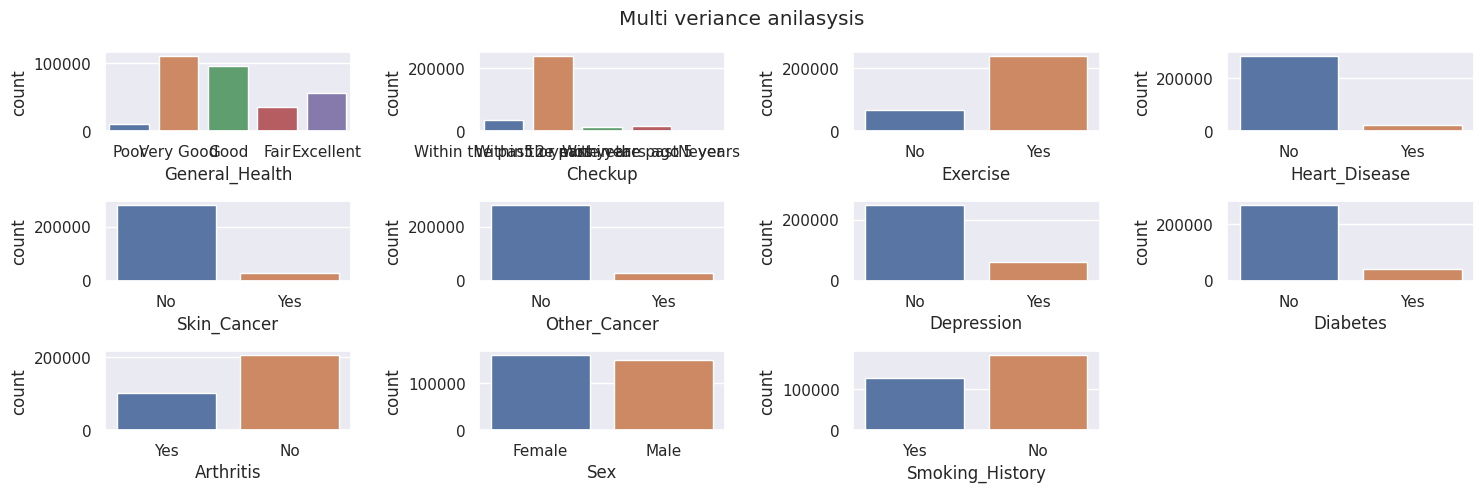

In [87]:

try:
  plt.suptitle("Multi veriance anilasysis")
  for i in range(len(catigorical_features)):
    plt.subplot(4,4,i+1)
    sns.countplot(x=data[catigorical_features[i]])
    plt.tight_layout()
except Exception as e:
  print(e)

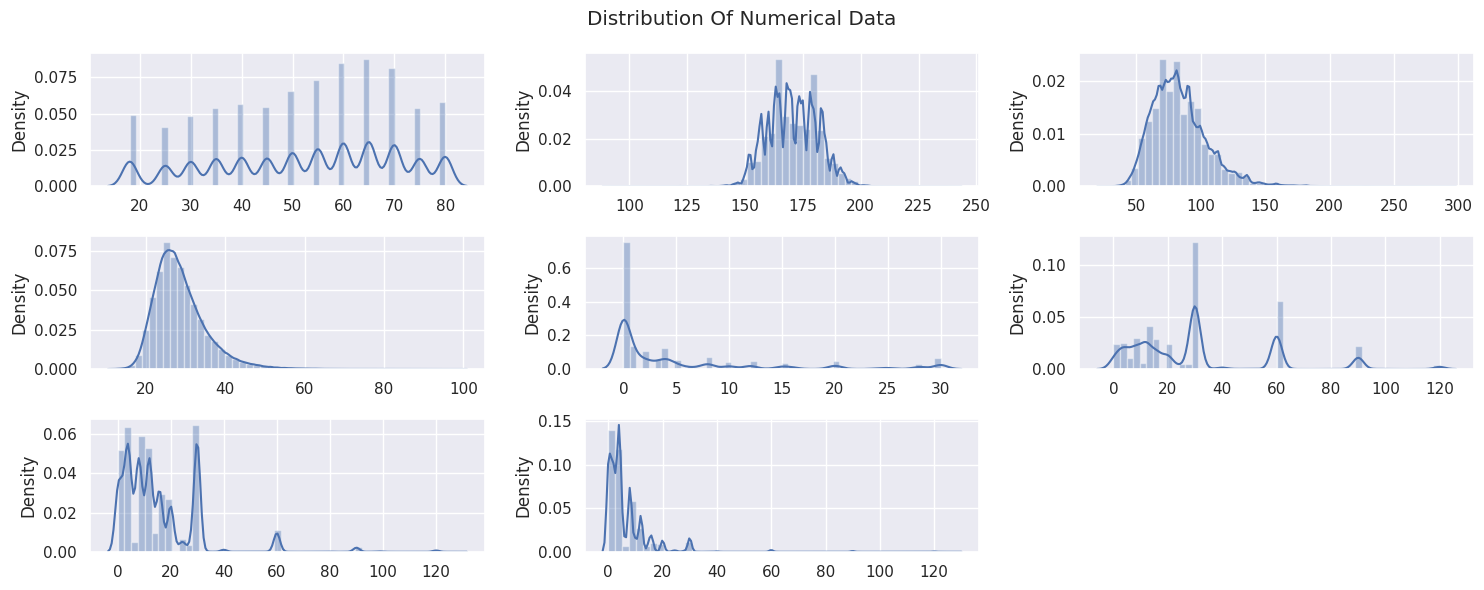

In [90]:
# now We Have To Check Distribution
try:
  plt.suptitle("Distribution Of Numerical Data")
  for i in range(len(numerical_features)):
    plt.subplot(3,3,i+1)
    sns.distplot(x=data[numerical_features[i]])
    plt.tight_layout()
except Exception as e:
  print(e)

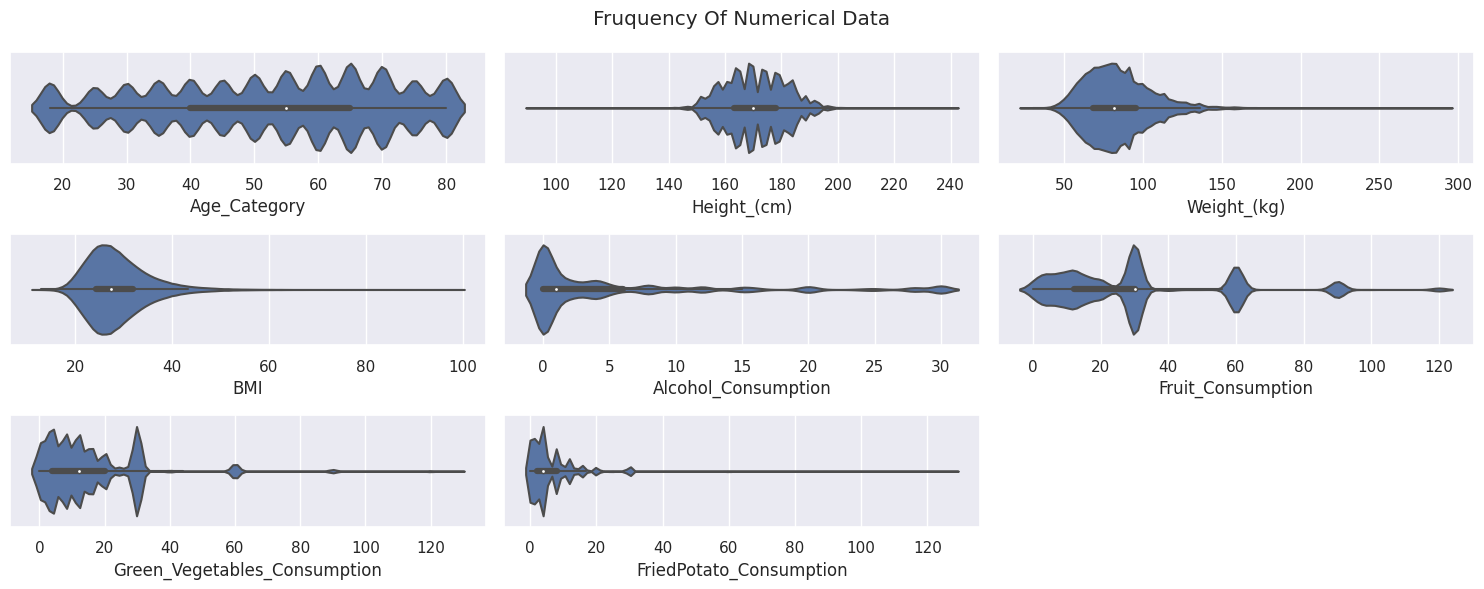

In [91]:
try:
  plt.suptitle("Fruquency Of Numerical Data")
  for i in range(len(numerical_features)):
    plt.subplot(3,3,i+1)
    sns.violinplot(x=data[numerical_features[i]])
    plt.tight_layout()
except Exception as e:
  print(e)

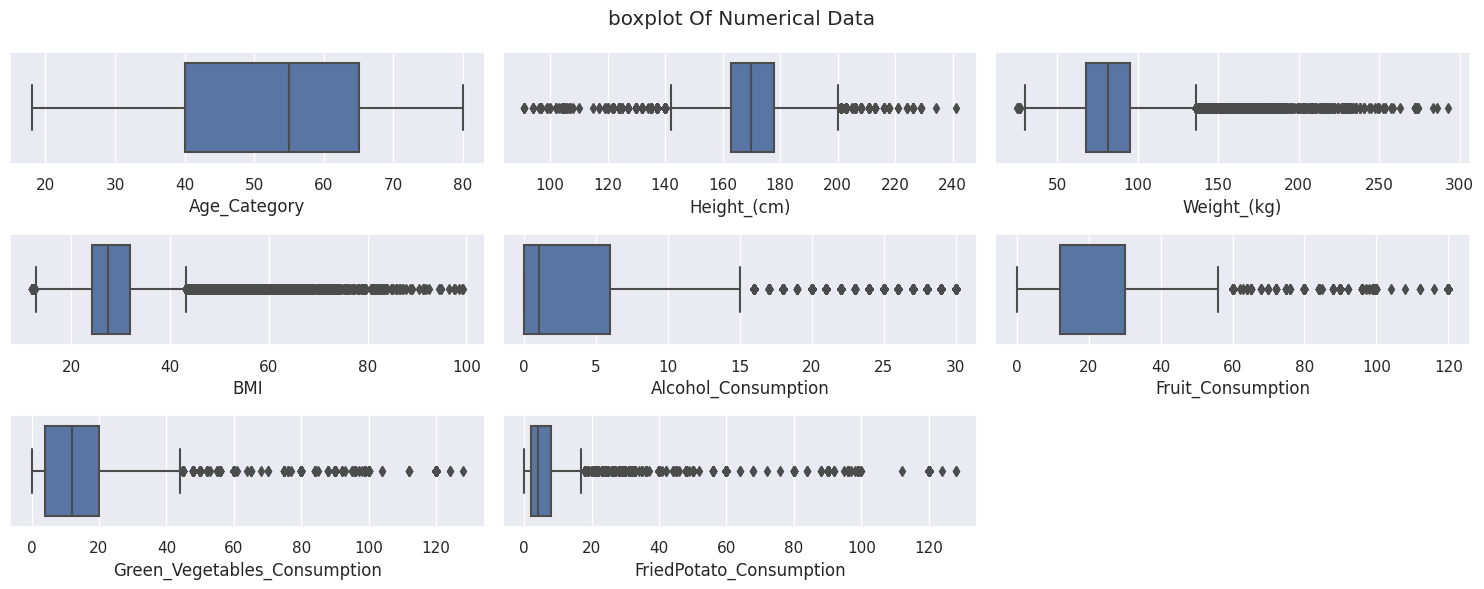

In [92]:
try:
  plt.suptitle("boxplot Of Numerical Data")
  for i in range(len(numerical_features)):
    plt.subplot(3,3,i+1)
    sns.boxplot(x=data[numerical_features[i]])
    plt.tight_layout()
except Exception as e:
  print(e)

<Axes: ylabel='General_Health'>

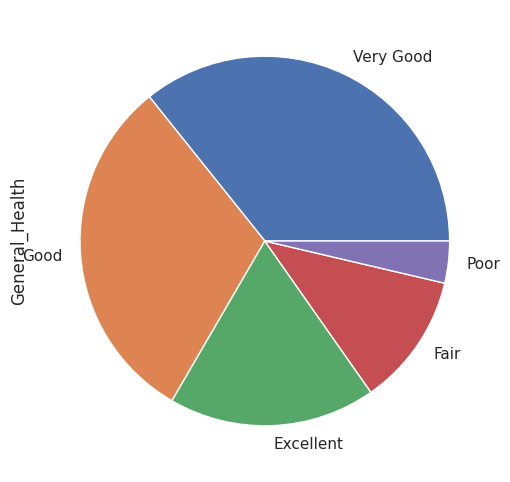

In [93]:
data["General_Health"].value_counts().plot.pie()

Text(0.5, 1.0, 'General_Health vs Checkup ')

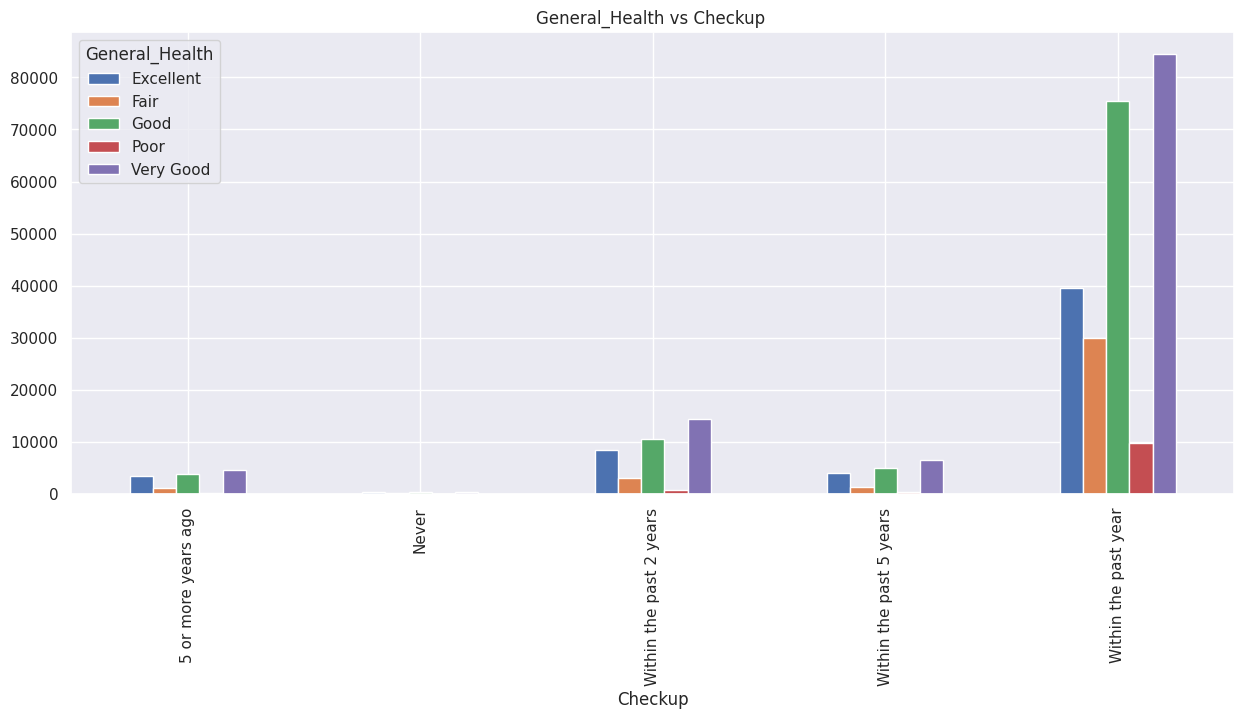

In [98]:
checkup = pd.crosstab(data["Checkup"],data["General_Health"])
checkup.plot(kind="bar")
plt.title("General_Health vs Checkup ")

Text(0.5, 1.0, 'General_Health vs Checkup ')

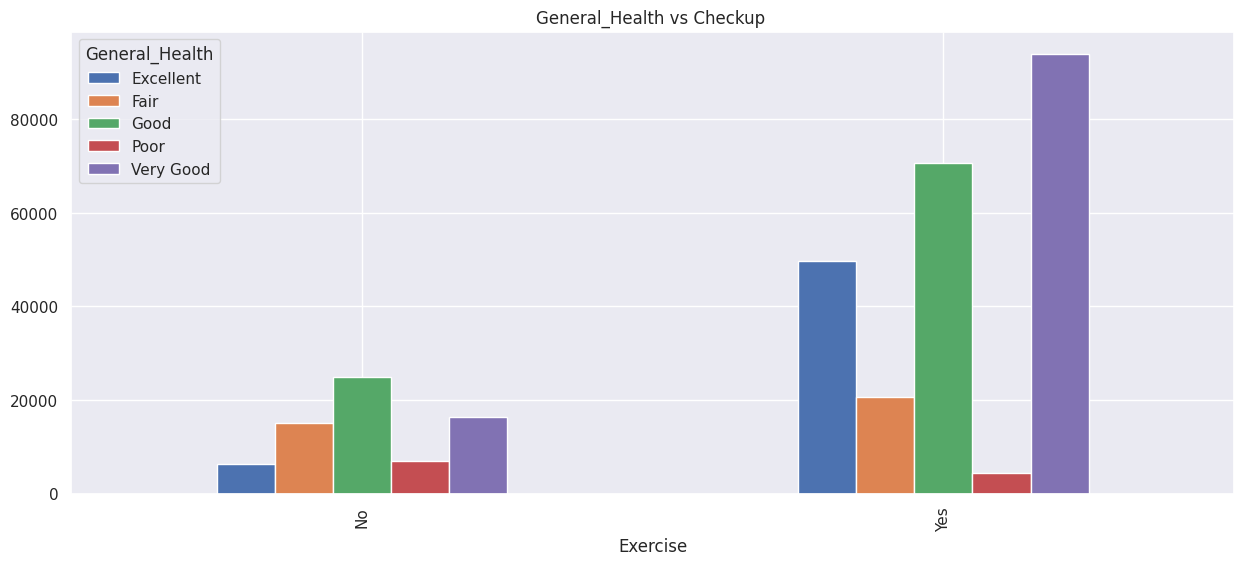

In [101]:
Exercise = pd.crosstab(data["Exercise"],data["General_Health"])
Exercise.plot(kind="bar")
plt.title("General_Health vs Checkup ")

Text(0.5, 1.0, 'General_Health vs Heart_Disease ')

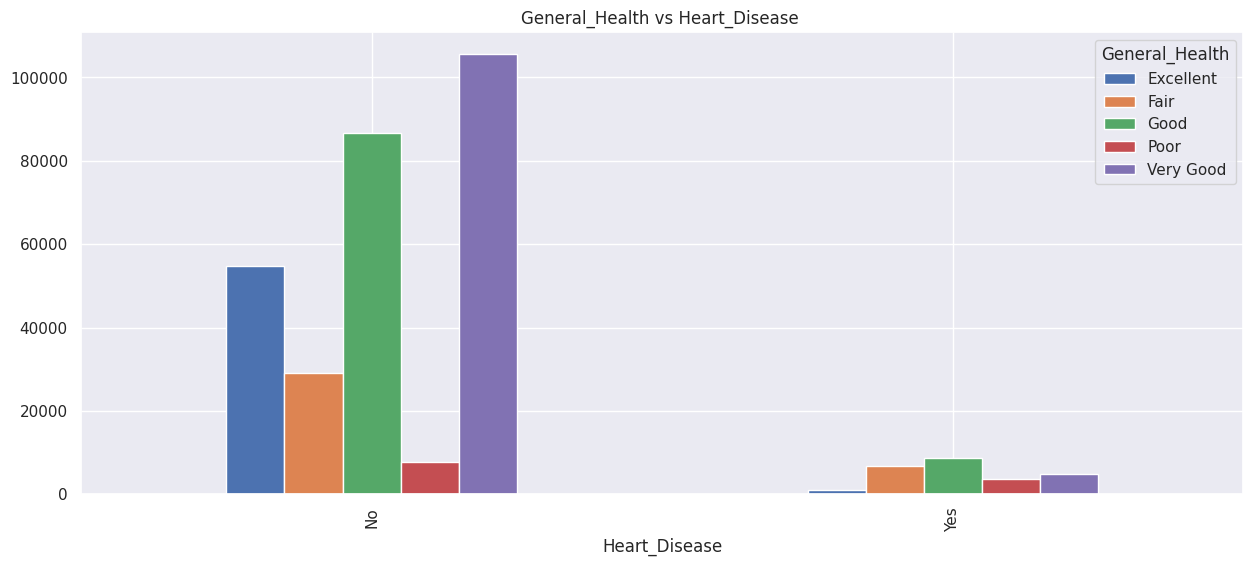

In [103]:
Heart_Disease = pd.crosstab(data["Heart_Disease"],data["General_Health"])
Heart_Disease.plot(kind="bar")
plt.title("General_Health vs Heart_Disease ")

Text(0.5, 1.0, 'General_Health vs Skin_Cancer ')

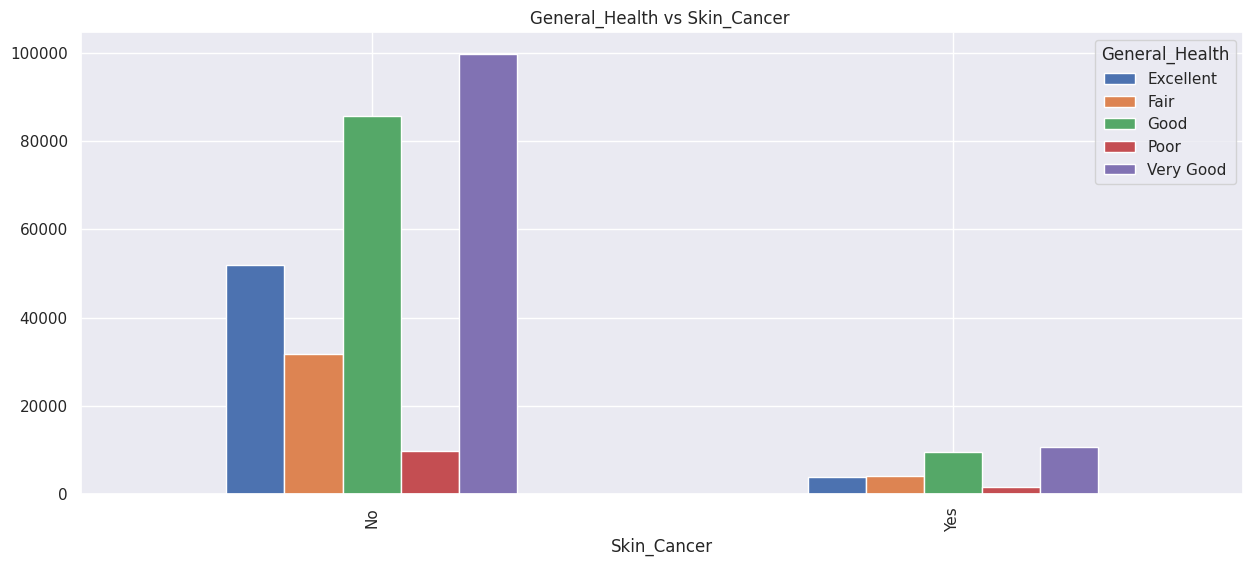

In [104]:
Skin_Cancer = pd.crosstab(data["Skin_Cancer"],data["General_Health"])
Skin_Cancer.plot(kind="bar")
plt.title("General_Health vs Skin_Cancer ")

Text(0.5, 1.0, 'General_Health vs Other_Cancer ')

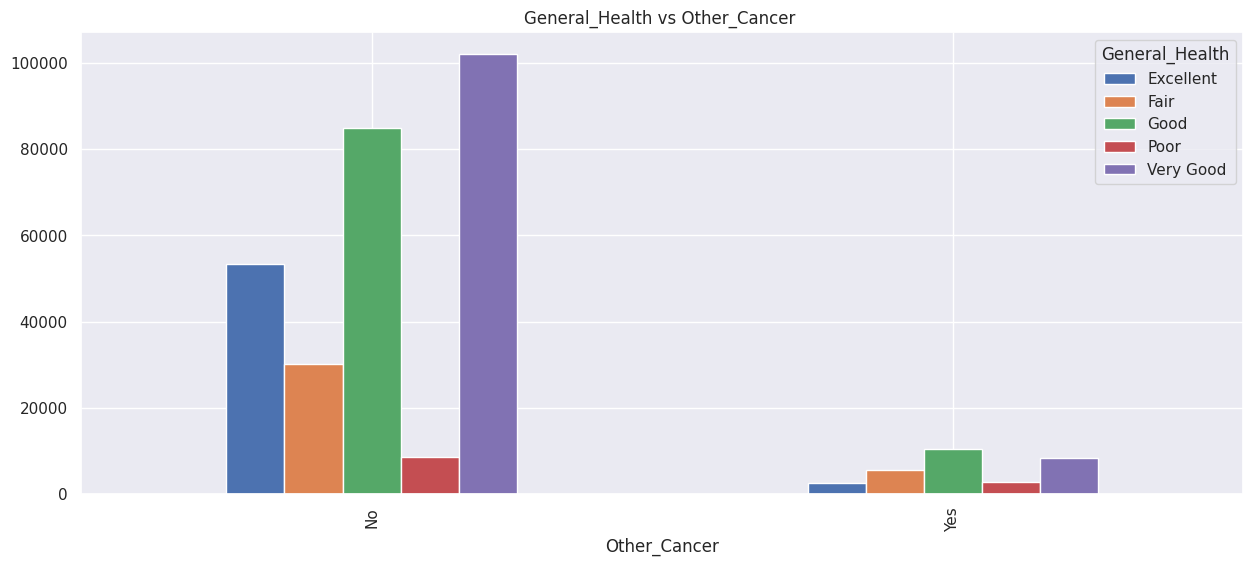

In [105]:
Other_Cancer = pd.crosstab(data["Other_Cancer"],data["General_Health"])
Other_Cancer.plot(kind="bar")
plt.title("General_Health vs Other_Cancer ")

Text(0.5, 1.0, 'General_Health vs Depression ')

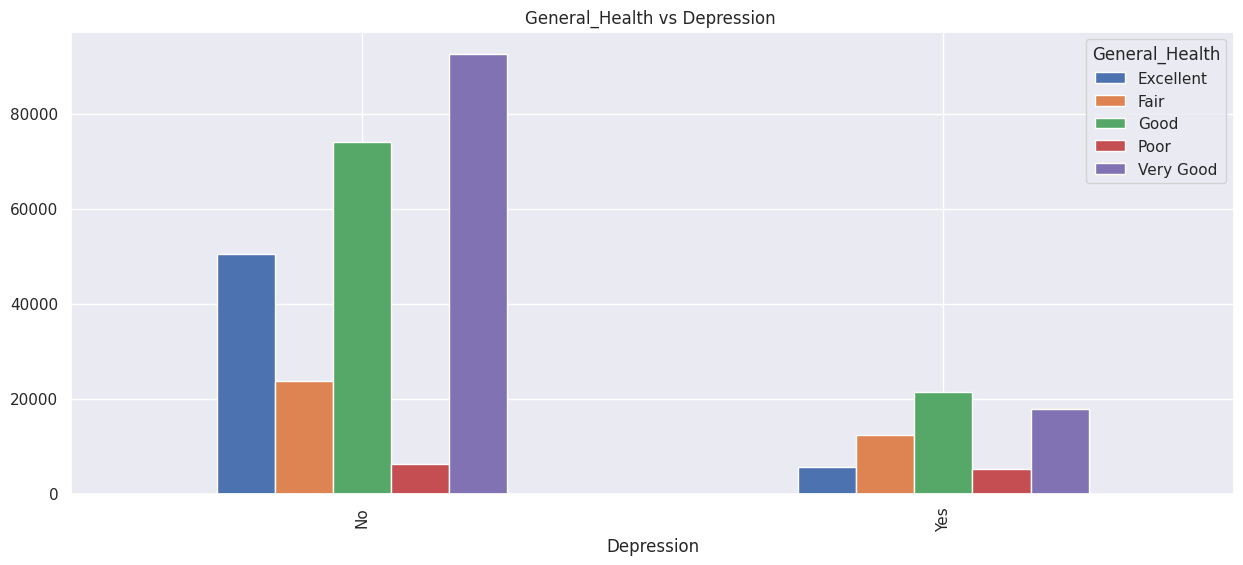

In [106]:
Depression = pd.crosstab(data["Depression"],data["General_Health"])
Depression.plot(kind="bar")
plt.title("General_Health vs Depression ")

Text(0.5, 1.0, 'General_Health vs Diabetes ')

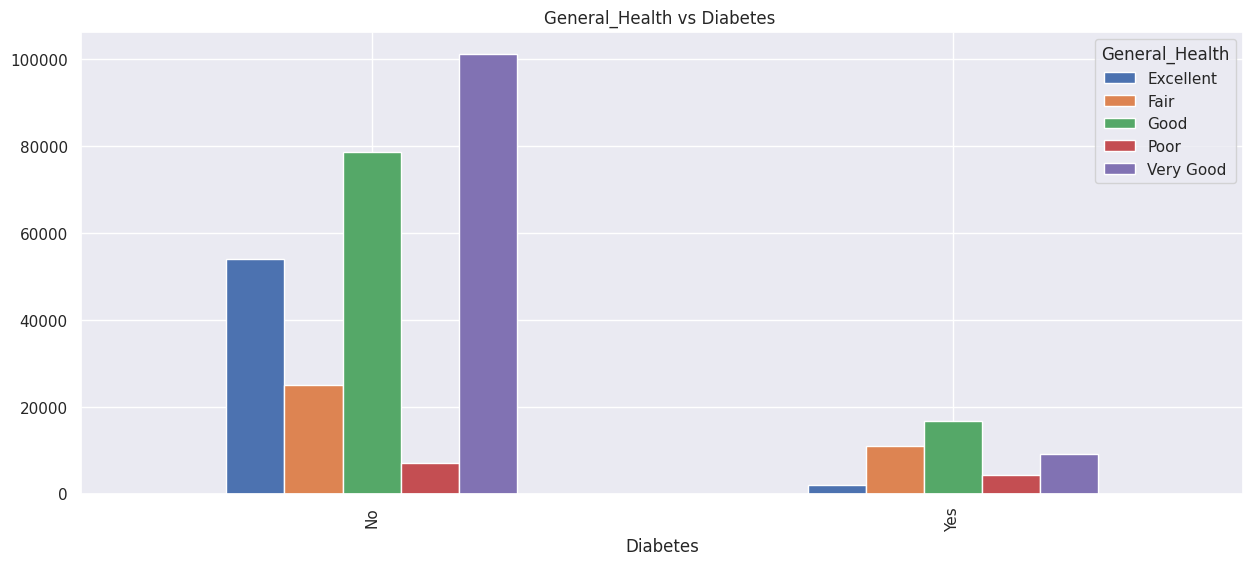

In [107]:
Diabetes = pd.crosstab(data["Diabetes"],data["General_Health"])
Diabetes.plot(kind="bar")
plt.title("General_Health vs Diabetes ")

Text(0.5, 1.0, 'General_Health vs Arthritis ')

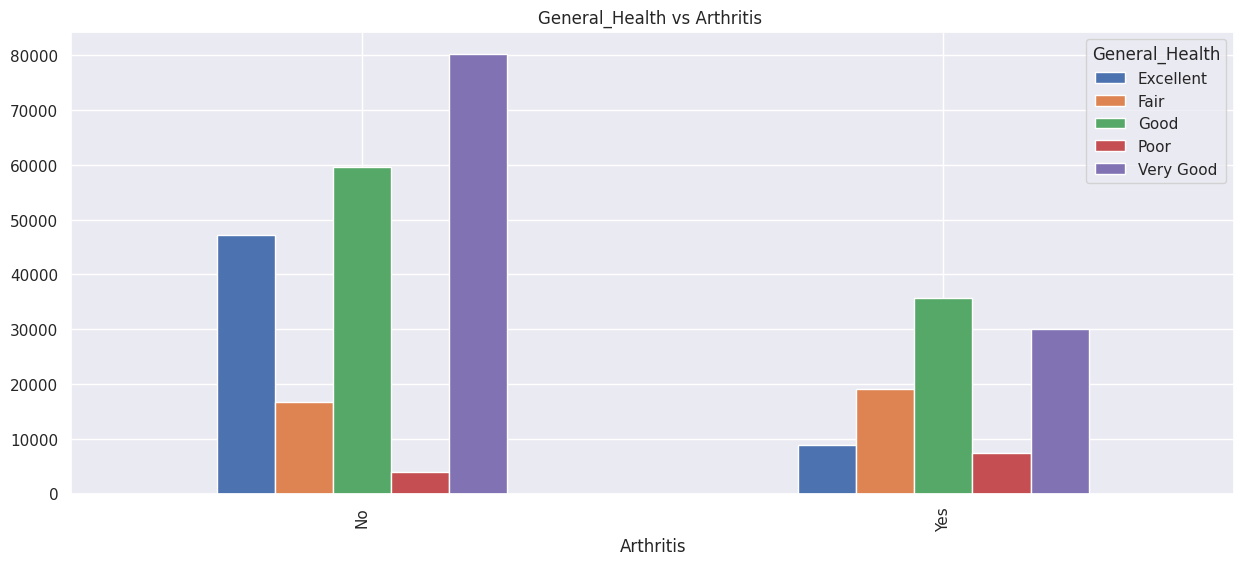

In [108]:
Arthritis = pd.crosstab(data["Arthritis"],data["General_Health"])
Arthritis.plot(kind="bar")
plt.title("General_Health vs Arthritis ")

Text(0.5, 1.0, 'General_Health vs Sex ')

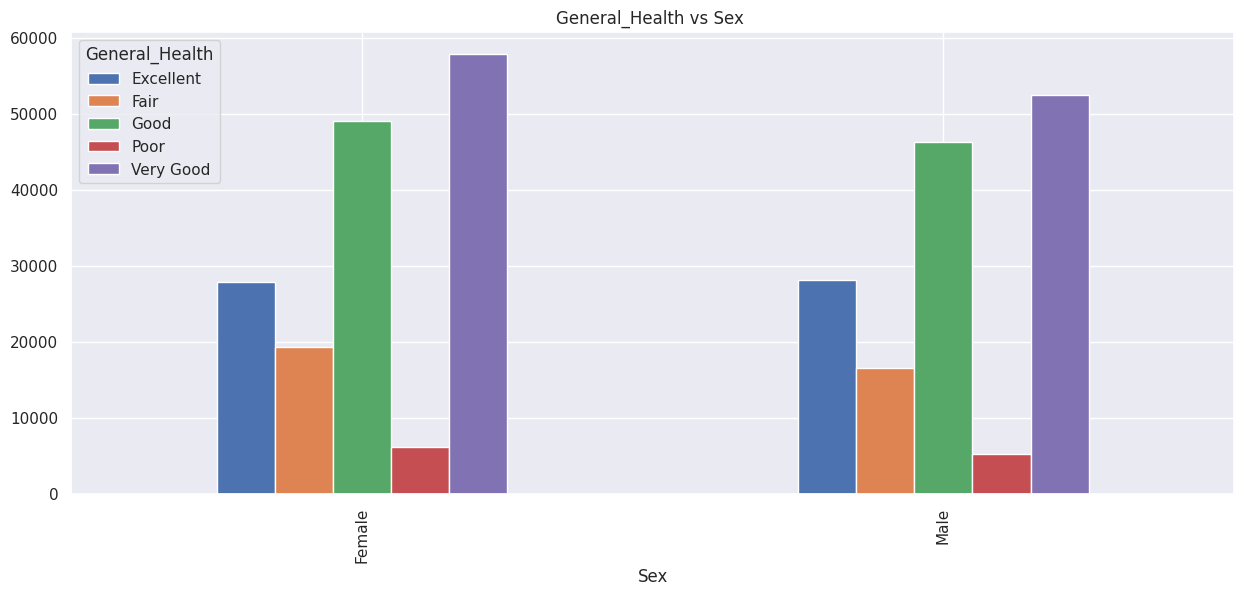

In [109]:
Sex = pd.crosstab(data["Sex"],data["General_Health"])
Sex.plot(kind="bar")
plt.title("General_Health vs Sex ")

Text(0.5, 1.0, 'General_Health vs Smoking_History ')

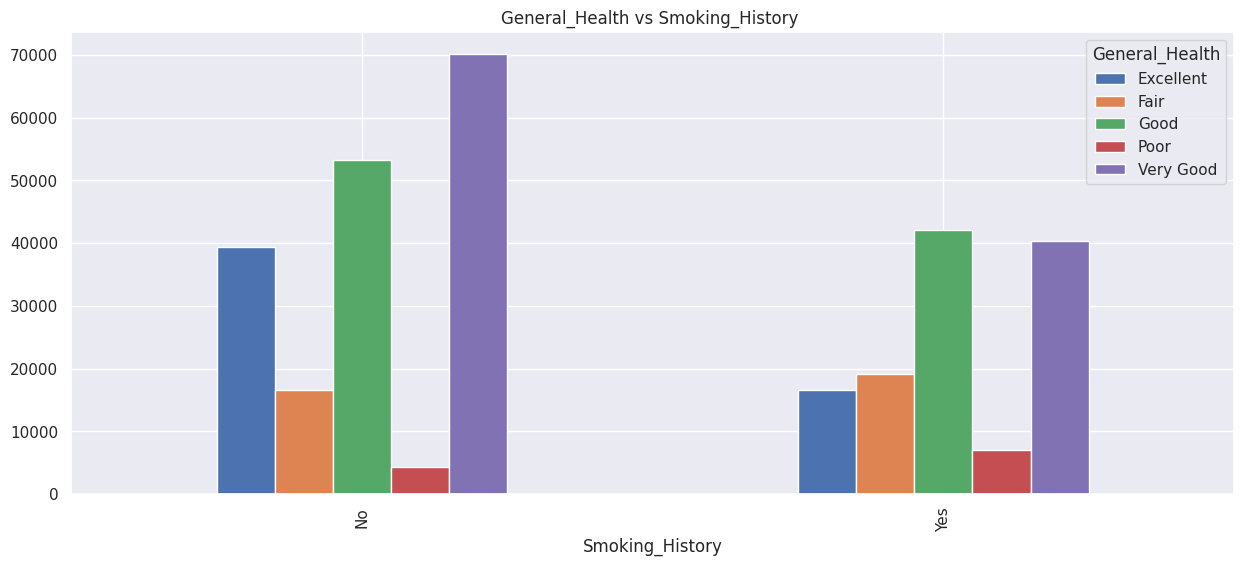

In [114]:
Smoking_History = pd.crosstab(data["Smoking_History"],data["General_Health"])
Smoking_History.plot(kind="bar")
plt.title("General_Health vs Smoking_History ")

In [116]:
from sklearn.preprocessing import LabelEncoder ## using lable encoding on catigorical data
lable = LabelEncoder()

for i in catigorical_features:
  lable.fit(data[i])
  data[i] = lable.fit_transform(data[i])

<Axes: >

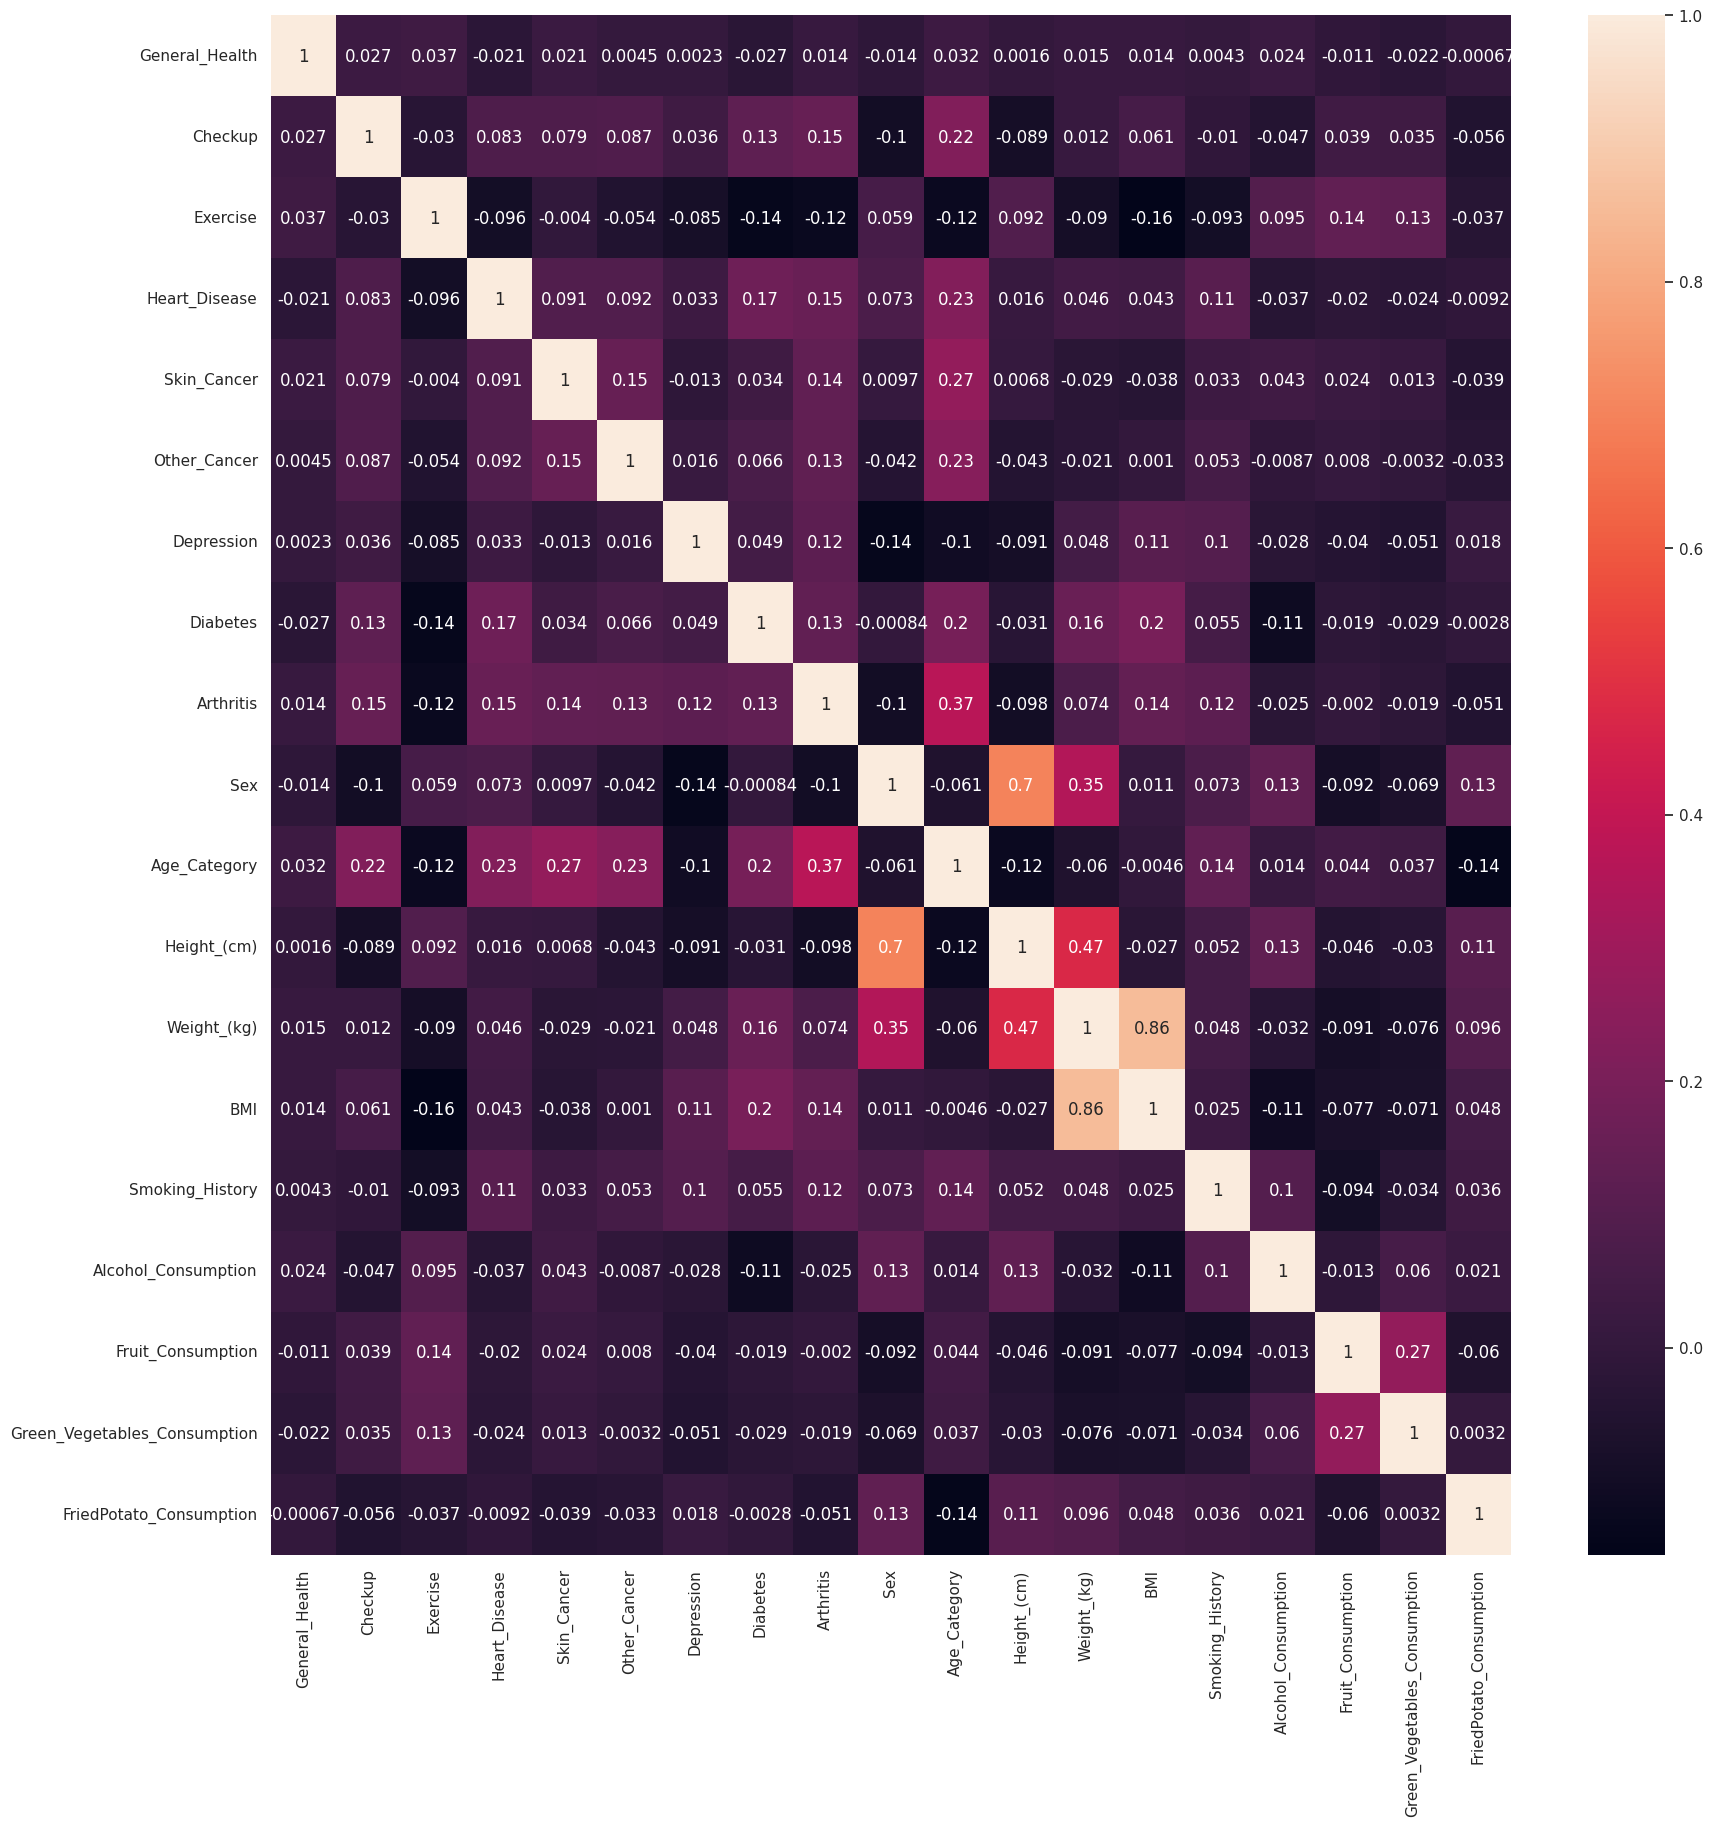

In [122]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),annot=True)

In [123]:
data

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,3,2,0,0,0,0,0,0,1,0,70,150.0,32.66,14.54,1,0.0,30.0,16.0,12.0
1,4,4,0,1,0,0,0,1,0,0,70,165.0,77.11,28.29,0,0.0,30.0,0.0,4.0
2,4,4,1,0,0,0,0,1,0,0,60,163.0,88.45,33.47,0,4.0,12.0,3.0,16.0
3,3,4,1,1,0,0,0,1,0,1,75,180.0,93.44,28.73,0,0.0,30.0,30.0,8.0
4,2,4,0,0,0,0,0,0,0,1,80,191.0,88.45,24.37,1,0.0,8.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308849,4,4,1,0,0,0,0,0,0,1,25,168.0,81.65,29.05,0,4.0,30.0,8.0,0.0
308850,1,3,1,0,0,0,0,1,0,1,65,180.0,69.85,21.48,0,8.0,15.0,60.0,4.0
308851,4,0,1,0,0,0,1,1,0,0,30,157.0,61.23,24.69,1,4.0,40.0,8.0,4.0
308852,4,4,1,0,0,0,0,0,0,1,65,183.0,79.38,23.73,0,3.0,30.0,12.0,0.0


In [143]:
# saprate dependent and indipendent features
x = data.drop("General_Health",axis=1)
y = data["Checkup"]

In [144]:
# now we have to split numerical and catigorical columns
catigorical_features = x.select_dtypes(include="object").columns
numerical_features = x.select_dtypes(exclude="object").columns
print(catigorical_features)
print("="*100)
print(numerical_features)

Index([], dtype='object')
Index(['Checkup', 'Exercise', 'Heart_Disease', 'Skin_Cancer', 'Other_Cancer',
       'Depression', 'Diabetes', 'Arthritis', 'Sex', 'Age_Category',
       'Height_(cm)', 'Weight_(kg)', 'BMI', 'Smoking_History',
       'Alcohol_Consumption', 'Fruit_Consumption',
       'Green_Vegetables_Consumption', 'FriedPotato_Consumption'],
      dtype='object')


In [145]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [146]:
# create numeric pipline
numpipline = Pipeline(
    steps=[
        ("imputer",SimpleImputer(strategy="median")),
        ("scaler",MinMaxScaler())
    ]
)

# Creating preprocessing object
preprocessor = ColumnTransformer([
    ("numpipline",numpipline,numerical_features)

])

In [147]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)

In [148]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(247083, 18)
(61771, 18)
(247083,)
(61771,)


In [152]:
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [155]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense ## Help To create Hidden Layers

In [158]:
model = Sequential()
model.add(Dense(18,activation="relu",input_dim=18))
model.add(Dense(300,activation="relu"))
model.add(Dense(250,activation="relu"))
model.add(Dense(150,activation="relu"))
model.add(Dense(5,activation="softmax"))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 18)                342       
                                                                 
 dense_6 (Dense)             (None, 300)               5700      
                                                                 
 dense_7 (Dense)             (None, 250)               75250     
                                                                 
 dense_8 (Dense)             (None, 150)               37650     
                                                                 
 dense_9 (Dense)             (None, 5)                 755       
                                                                 
Total params: 119,697
Trainable params: 119,697
Non-trainable params: 0
_________________________________________________________________


In [159]:
model.layers

In [160]:
LOSS_FUNCTION = "sparse_categorical_crossentropy"
OPTIMIZER = "Adam"
METRICES = ["accuracy"]

In [161]:
import time

def get_log_path(log_dir="logs/fit"):
  fileName = time.strftime("log_%Y_%m_%d_%H_%M_%S")
  logs_path = os.path.join(log_dir, fileName)
  print(f"Saving logs at {logs_path}")
  return logs_path

log_dir = get_log_path()
tb_cb = tensorflow.keras.callbacks.TensorBoard(log_dir=log_dir)

Saving logs at logs/fit/log_2023_08_02_13_19_18


In [162]:
## Early stoping
early_stopping = tensorflow.keras.callbacks.EarlyStopping(patience=5,restore_best_weights=True)

In [163]:
# check point callback
CKPT_path = "Model_ckpt.h5"
checkpointing_cb = tensorflow.keras.callbacks.ModelCheckpoint(CKPT_path, save_best_only=True)

In [165]:
model.compile(optimizer=OPTIMIZER,loss=LOSS_FUNCTION,metrics=METRICES)

In [167]:
history = model.fit(X_train,y_train,epochs=50,validation_split=0.2,callbacks=[tb_cb,early_stopping,checkpointing_cb])

Epoch 1/50
6178/6178 [==============================] - 27s 4ms/step - loss: 0.0014 - accuracy: 0.9997 - val_loss: 2.3031e-05 - val_accuracy: 1.0000
Epoch 2/50
6178/6178 [==============================] - 30s 5ms/step - loss: 5.9695e-04 - accuracy: 0.9999 - val_loss: 4.1927e-05 - val_accuracy: 1.0000
Epoch 3/50
6178/6178 [==============================] - 29s 5ms/step - loss: 1.6923e-06 - accuracy: 1.0000 - val_loss: 1.3918e-06 - val_accuracy: 1.0000
Epoch 4/50
6178/6178 [==============================] - 30s 5ms/step - loss: 7.9161e-04 - accuracy: 0.9999 - val_loss: 0.0019 - val_accuracy: 0.9995
Epoch 5/50
6178/6178 [==============================] - 31s 5ms/step - loss: 2.9649e-04 - accuracy: 0.9999 - val_loss: 2.8628e-07 - val_accuracy: 1.0000
Epoch 6/50
6178/6178 [==============================] - 28s 5ms/step - loss: 3.1519e-08 - accuracy: 1.0000 - val_loss: 2.8178e-08 - val_accuracy: 1.0000
Epoch 7/50
6178/6178 [==============================] - 30s 5ms/step - loss: 2.3110e-09 - 

In [171]:
from sklearn.metrics import accuracy_score,classification_report,roc_auc_score

In [173]:
ypredict = model.predict(X_test)

1931/1931 [==============================] - 5s 2ms/step


In [175]:
ypredict = ypredict.argmax(axis=-1)

In [184]:
print(accuracy_score(ypredict,y_test))
print(classification_report(ypredict,y_test))

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2634
           1       1.00      1.00      1.00       287
           2       1.00      1.00      1.00      7433
           3       1.00      1.00      1.00      3500
           4       1.00      1.00      1.00     47917

    accuracy                           1.00     61771
   macro avg       1.00      1.00      1.00     61771
weighted avg       1.00      1.00      1.00     61771



In [187]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,1.449485e-03,0.999707,2.303125e-05,1.000000
1,5.969467e-04,0.999853,4.192749e-05,0.999980
2,1.692252e-06,1.000000,1.391809e-06,1.000000
3,7.916085e-04,0.999894,1.896595e-03,0.999494
4,2.964933e-04,0.999939,2.862804e-07,1.000000
5,3.151875e-08,1.000000,2.817765e-08,1.000000
6,2.311011e-09,1.000000,8.579503e-09,1.000000
7,1.465495e-10,1.000000,4.098113e-09,1.000000
8,1.990179e-11,1.000000,8.370558e-10,1.000000
9,0.000000e+00,1.000000,3.136005e-11,1.000000


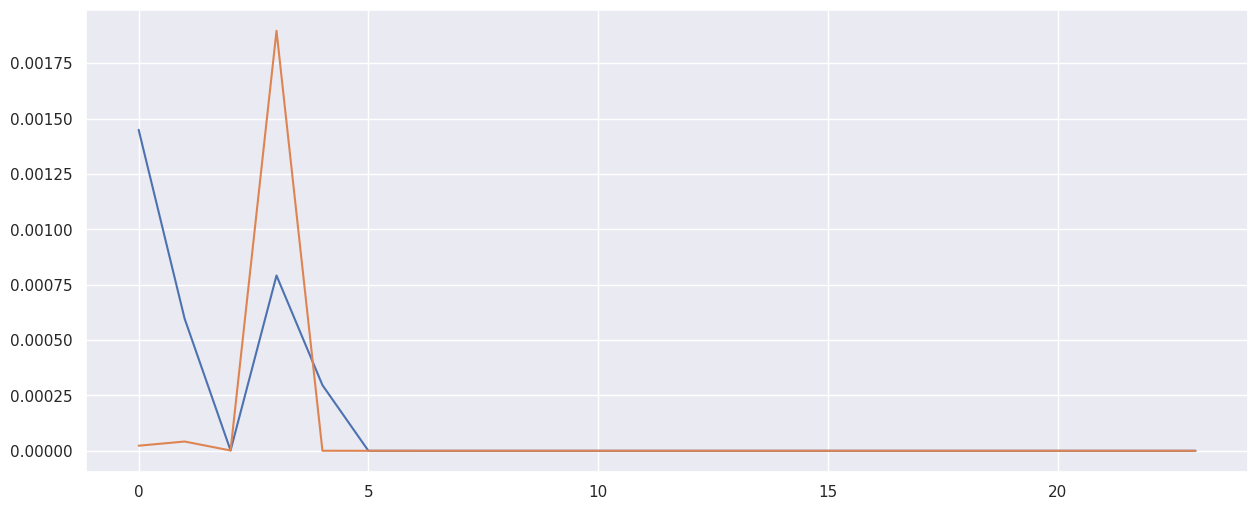

In [188]:
# plot and see the accuracy and loss
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

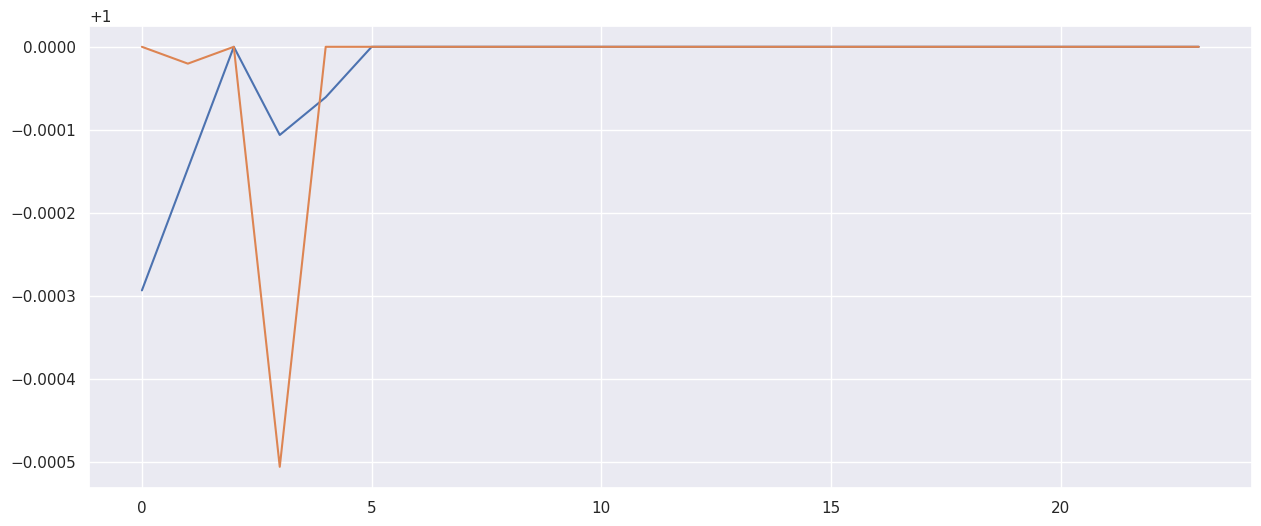

In [190]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])

<Axes: >

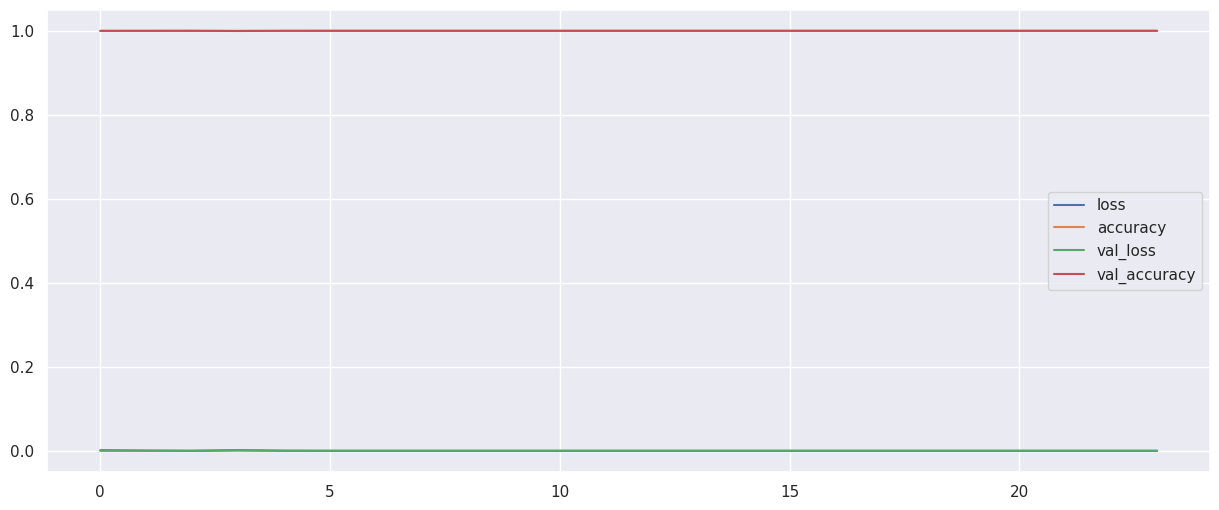

In [191]:
pd.DataFrame(history.history).plot()

In [192]:
y_test[:20]

302051    4
59950     4
203639    4
78768     4
216156    4
84107     4
284341    4
227575    4
19010     2
123471    3
153765    4
197515    4
64189     0
152430    0
11518     2
252630    4
218232    4
231288    4
16249     1
244775    4
Name: Checkup, dtype: int64

In [193]:
ypredict[:20]

array([4, 4, 4, 4, 4, 4, 4, 4, 2, 3, 4, 4, 0, 0, 2, 4, 4, 4, 1, 4])